## Basic characteristics of anisotropic images

##### Created: 2020.08.25

##### Modified: 2020.08.26

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

from pathlib import Path
from fastai.utils.mem import *

In [3]:
import sys
sys.path.append('functions')

%aimport functions00, functions01
from functions00 import *
from functions01 import *

In [4]:
mk_get_host_info()

**********************************************************************************************************************************
Settings:
	HOST:  mmiv-ml-titan
	PATH_ROOT_DATA:  /data-10tb/shared/skull/train-3d-iso
	PATH_GIT_HUB:  /data-10tb/marek/github_codes/skull-stripping-1/fastai
	PATH_2D: /data-10tb/shared/skull

3D NIFTI image DF paths (_mk_3D):
	IXI_TEST_3D: /data-10tb/marek/github_codes/skull-stripping-1/fastai/2.2_train_valid_test_sets/ixi_test_mk_3d.csv
	TEST_3D : /data-10tb/marek/github_codes/skull-stripping-1/fastai/2.2_train_valid_test_sets/test_mk_3d.csv
	TRAIN_VAL_3D: /data-10tb/marek/github_codes/skull-stripping-1/fastai/2.2_train_valid_test_sets/train_val_mk_3d.csv
	NFBS_TEST_3D: /data-10tb/marek/github_codes/skull-stripping-1/fastai/2.2_train_valid_test_sets/nfbs_test_mk_3d.csv

Error files (pickle):
	ERROR_FILES: /data-10tb/marek/github_codes/skull-stripping-1/fastai/2.2_train_valid_test_sets/error_files
***********************************************************

#### Some global variables

In [5]:
ANISO_PTH = Path(f'/data-10tb/marek/github_codes/skull-stripping-1/fastai/1.0_results/')

### T1_bias Aniso

In [6]:
bias_ixi = pd.read_excel(ANISO_PTH/'ixi_aniso.xlsx', sheet_name='t1_bias_im')
bias_adni = pd.read_excel(ANISO_PTH/'adni_aniso.xlsx', sheet_name='t1_bias_im')
bias_aibl = pd.read_excel(ANISO_PTH/'aibl_aniso.xlsx', sheet_name='t1_bias_im')
bias_ppmi = pd.read_excel(ANISO_PTH/'ppmi_aniso.xlsx', sheet_name='t1_bias_im')
bias_slim = pd.read_excel(ANISO_PTH/'slim_aniso.xlsx', sheet_name='t1_bias_im')
bias_sald = pd.read_excel(ANISO_PTH/'sald_aniso.xlsx', sheet_name='t1_bias_im')
bias_hcp = pd.read_excel(ANISO_PTH/'hcp_aniso.xlsx', sheet_name='t1_bias_im')
bias_ixi.head(2)

,Examination,Image,Max,Mean,Min,Dtype,Size_1,Size_2,Size_3,Pixdim_1,Pixdim_2,Pixdim_3
0,IXI002-Guys-0828-T1.anat,T1_biascorr.nii.gz,1069.679321,119.888452,0,float64,150,256,181,1.199997,0.9375,0.9375
1,IXI012-HH-1211-T1.anat,T1_biascorr.nii.gz,3635.520996,416.227917,0,float64,150,256,181,1.200004,0.9375,0.9375


### Get images used in our experiment (both TRAIN & TEST)

In [7]:
df_train = pd.read_csv(TRAIN_VAL_3D)
df_test = pd.read_csv(TEST_3D)
df_tt = pd.concat([df_train, df_test])
df_tt = df_tt.sort_values(by='source')
df_tt.head(2)
print(df_train.shape[0], df_test.shape[0], df_tt.shape[0])

2791 934 3725


In [8]:
# obie wersje dzialaja
#df_db = df_tt[df_tt.source.str.contains('AIBL')
#db_name_df = df_tt.loc[df_tt['source'] ==  DB_NAME]

df_tt.source.unique()

array(['ADNI', 'AIBL', 'CalgaryCampinas', 'PPMI', 'SALD', 'SLIM'], dtype=object)

### Local functions

In [32]:
def find_valid_examinations_in_db(tt_df_all, aniso_db, db_name):
    """
    Gets valid examinations from the whole data base.
    
    Based on both test and train examination list, each examination is identified
    and search for in Excel file for all anisotropic examinations.
    
    Parameters:
    tt_df - test + train df for all data bases
    aniso_db - df for all images in db, read from Excel file (.e.g 'ixi_aniso.xlsx', sheet_name='t1_bias_im')
    db_name - data base name
    
    C: 2020.08.26
    M: 2020.08.26
    """
    tt_df = tt_df_all.loc[tt_df_all['source'] ==  db_name]
    
    x = tt_df.bias_pth_titan.str.split(f'/{db_name}/', expand=True)
    y = x[1].str.split('_T1_', expand=True)
    exams = y[0]

    df_list = []
    for ex in exams:
        df_list.append(aniso_db[aniso_db.Examination.str.contains(ex)])
        
    print(f'{db_name}')
    print(f'\tAniso df shape:\t\t{aniso_db.shape}')
    print(f'\tTrain+Test df shape:\t{tt_df.shape}\n')
    return pd.concat(df_list)

#### Get list of exams from df_db ('ADNI') to search for in bias_ADNI)

#### ADNI

In [36]:
DB_NAME = 'ADNI'
DB_ANISO_DF = bias_adni

df_adni = find_valid_examinations_in_db(df_tt, DB_ANISO_DF, DB_NAME )
df_n.head(2)

ADNI
	Aniso df shape:		(7921, 12)
	Train+Test df shape:	(1130, 16)



,Examination,Image,Max,Mean,Min,Dtype,Size_1,Size_2,Size_3,Pixdim_1,Pixdim_2,Pixdim_3
811,sub-30885_ses-1_T1w.anat,T1_biascorr.nii.gz,1094.128418,98.024886,0,float64,176,256,170,1.0,1.0,1.0
806,sub-30882_ses-1_T1w.anat,T1_biascorr.nii.gz,1402.876709,103.324594,0,float64,176,256,170,1.0,1.0,1.0


#### AIBL

In [37]:
DB_NAME = 'AIBL'
DB_ANISO_DF = bias_aibl

df_adni = find_valid_examinations_in_db(df_tt, DB_ANISO_DF, DB_NAME )
df_n.head(2)

AIBL
	Aniso df shape:		(726, 12)
	Train+Test df shape:	(601, 16)



,Examination,Image,Max,Mean,Min,Dtype,Size_1,Size_2,Size_3,Pixdim_1,Pixdim_2,Pixdim_3
811,sub-30885_ses-1_T1w.anat,T1_biascorr.nii.gz,1094.128418,98.024886,0,float64,176,256,170,1.0,1.0,1.0
806,sub-30882_ses-1_T1w.anat,T1_biascorr.nii.gz,1402.876709,103.324594,0,float64,176,256,170,1.0,1.0,1.0


### CalgaryCampinas - BRAK DANYCH

In [ ]:
DB_NAME = 'CC'
DB_ANISO_DF = bias_ca

df_adni = find_valid_examinations_in_db(df_tt, DB_ANISO_DF, DB_NAME )
df_n.head(2)

### PPMI

In [38]:
DB_NAME = 'PPMI'
DB_ANISO_DF = bias_ppmi

df_adni = find_valid_examinations_in_db(df_tt, DB_ANISO_DF, DB_NAME )
df_n.head(2)

PPMI
	Aniso df shape:		(752, 12)
	Train+Test df shape:	(130, 16)



,Examination,Image,Max,Mean,Min,Dtype,Size_1,Size_2,Size_3,Pixdim_1,Pixdim_2,Pixdim_3
811,sub-30885_ses-1_T1w.anat,T1_biascorr.nii.gz,1094.128418,98.024886,0,float64,176,256,170,1.0,1.0,1.0
806,sub-30882_ses-1_T1w.anat,T1_biascorr.nii.gz,1402.876709,103.324594,0,float64,176,256,170,1.0,1.0,1.0


## T1

In [33]:
t1_hcp.head()

,Examination,Image,Max,Mean,Min,Dtype,Size_1,Size_2,Size_3,Pixdim_1,Pixdim_2,Pixdim_3
0,100206_3T_T1w_MPR1.anat,T1.nii.gz,4095,423.823266,0,float64,256,320,243,0.7,0.7,0.7
1,100307_3T_T1w_MPR1.anat,T1.nii.gz,3511,311.551633,0,float64,256,320,243,0.7,0.7,0.7
2,100408_3T_T1w_MPR1.anat,T1.nii.gz,4095,396.429113,0,float64,256,320,243,0.7,0.7,0.7
3,100610_3T_T1w_MPR1.anat,T1.nii.gz,4095,481.116009,0,float64,256,320,243,0.7,0.7,0.7
4,100610_3T_T1w_MPR2.anat,T1.nii.gz,4095,462.710013,0,float64,256,320,243,0.7,0.7,0.7


### Voxes sizes and spacing

#### IXI

In [11]:
s_ixi = np.vstack((t1_ixi.Size_1, t1_ixi.Size_2, t1_ixi.Size_3 )).T
val, cnt = np.unique(s_ixi, axis=0, return_counts=True)
_ = [print(f'{v} ---> {c}')  for v,c in zip(val, cnt)]

[130 256 181] ---> 2
[140 256 181] ---> 2
[146 256 181] ---> 74
[150 256 174] ---> 5
[150 256 181] ---> 498


In [25]:
p_ixi = np.vstack((t1_ixi.Pixdim_1, t1_ixi.Pixdim_2, t1_ixi.Pixdim_3 )).T
val, cnt = np.unique(p_ixi.round(3), axis=0, return_counts=True)
_ = [print(f'{v} ---> {c}')  for v,c in zip(val, cnt)]

[1.2   0.937 0.937] ---> 37
[1.2   0.937 0.938] ---> 65
[1.2   0.938 0.937] ---> 24
[1.2   0.938 0.938] ---> 450
[1.2   0.977 0.977] ---> 5


### T1 -Max and mean values

In [16]:
mx = pd.DataFrame({'ixi':t1_ixi['Max'], 'adni':t1_adni['Max'], 'ppmi':t1_ppmi['Max'], 
                  'aibl':t1_aibl['Max'], 'sald':t1_sald['Max'], 'slim':t1_slim['Max'], 'hcp':t1_hcp['Max']})
mx.head().round(0)

,ixi,adni,ppmi,aibl,sald,slim,hcp
0,1068.0,2650.0,906.0,871.0,883.0,1399.0,4095.0
1,3997.0,2686.0,1005.0,1017.0,923.0,1291.0,3511.0
2,4466.0,2255.0,766.0,883.0,1097.0,1463.0,4095.0
3,4479.0,3777.0,880.0,1058.0,1137.0,1653.0,4095.0
4,4433.0,2603.0,812.0,1024.0,1179.0,1477.0,4095.0


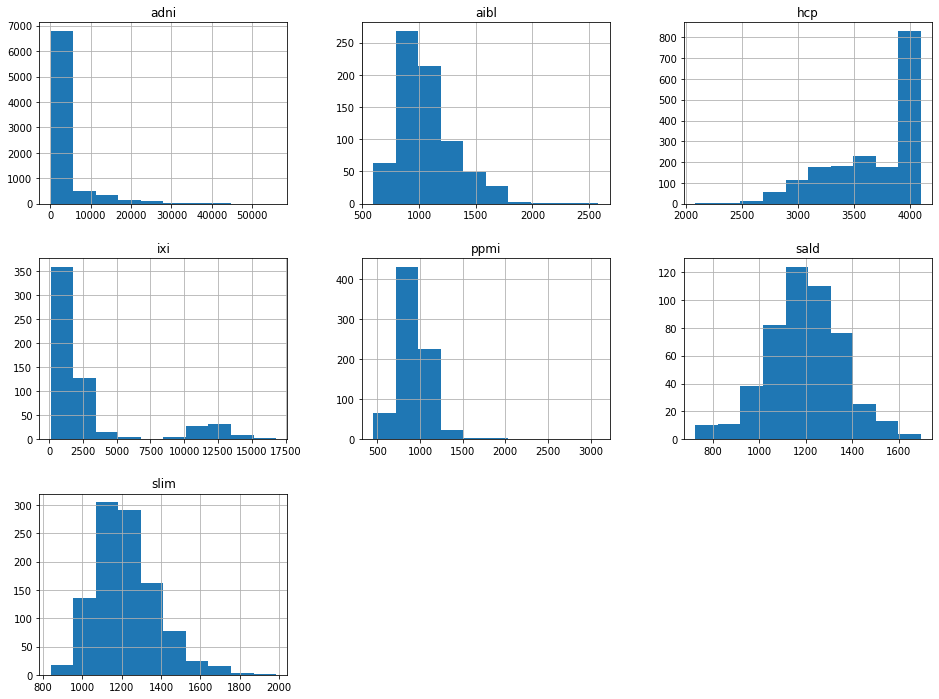

In [17]:
_= pd.DataFrame.hist(mx, figsize=(16,12))

In [18]:
mx.adni.max()

55883.5625

In [20]:
mean1 = pd.DataFrame({'ixi':t1_ixi['Mean'], 'adni':t1_adni['Mean'], 'ppmi':t1_ppmi['Mean'], 
                  'aibl':t1_aibl['Mean'], 'sald':t1_sald['Mean'], 'slim':t1_slim['Mean'], 'hcp':t1_hcp['Mean']})
mean1.head().round(0)

,ixi,adni,ppmi,aibl,sald,slim,hcp
0,118.0,265.0,97.0,84.0,69.0,101.0,424.0
1,420.0,264.0,116.0,87.0,89.0,126.0,312.0
2,412.0,266.0,86.0,103.0,103.0,168.0,396.0
3,316.0,242.0,110.0,121.0,109.0,104.0,481.0
4,364.0,246.0,105.0,105.0,123.0,153.0,463.0


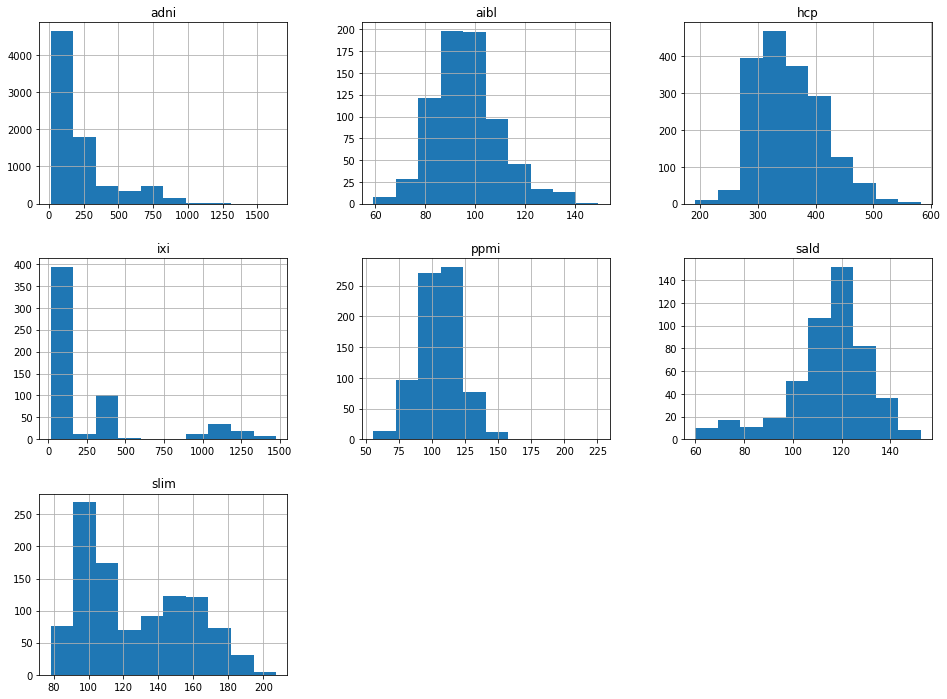

In [22]:
_= pd.DataFrame.hist(mean1, figsize=(16,12))

(0, 8000)

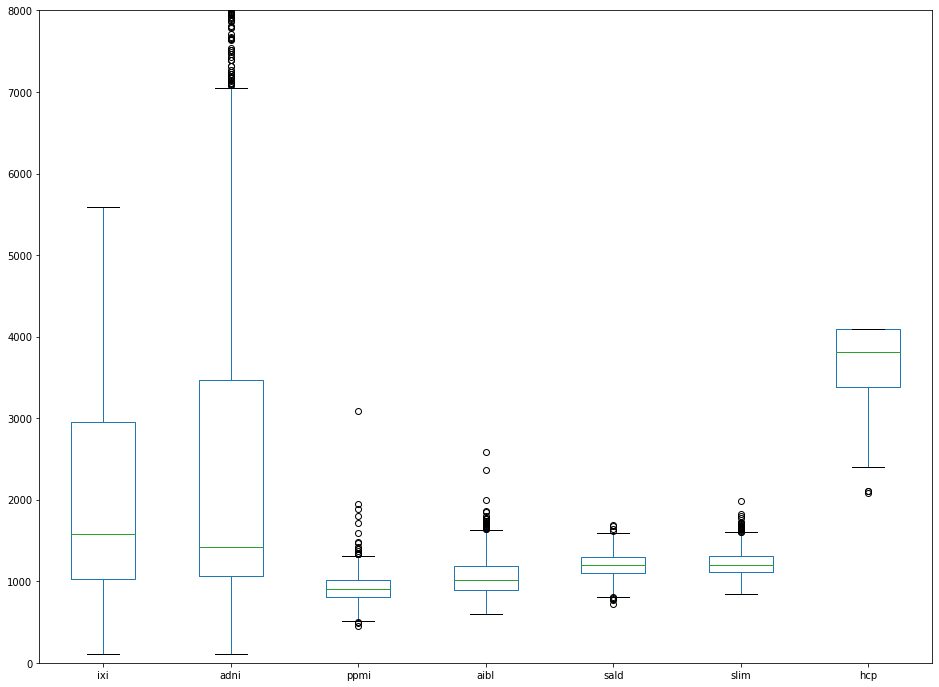

In [23]:
ax1 = mx.plot(kind='box', figsize=(16,12))
ax1.set_ylim(0,8000)

(0, 600)

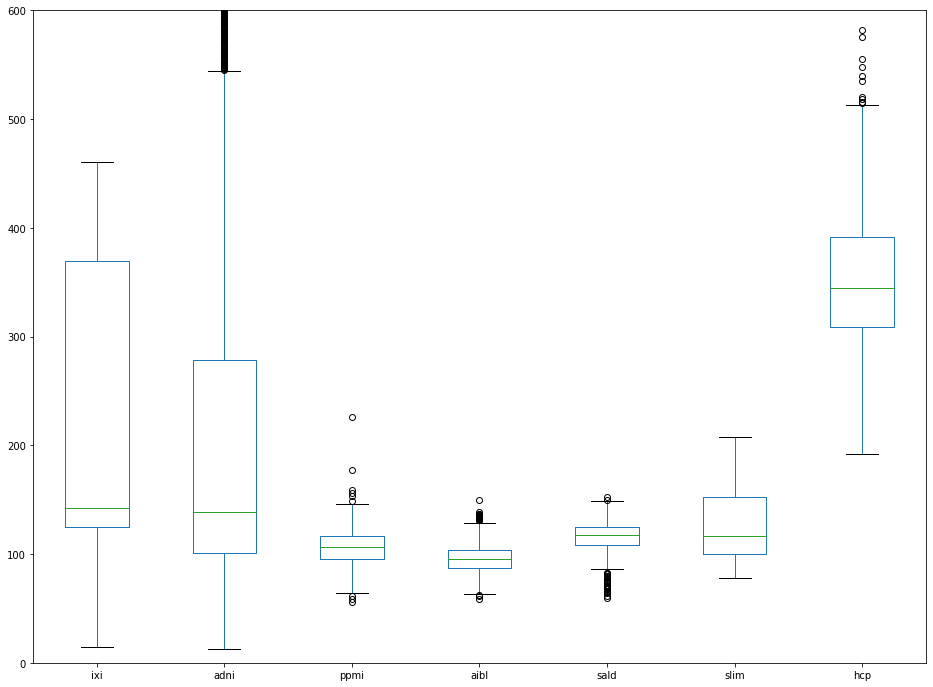

In [24]:
ax2 = mean1.plot(kind='box', figsize=(16,12))
ax2.set_ylim(0,600)

### T1_biascorr -Max and mean values

In [3]:
bias_ixi = pd.read_excel(ANISO_PTH/'ixi_aniso.xlsx', sheet_name='t1_bias_im')
bias_adni = pd.read_excel(ANISO_PTH/'adni_aniso.xlsx', sheet_name='t1_bias_im')
bias_aibl = pd.read_excel(ANISO_PTH/'aibl_aniso.xlsx', sheet_name='t1_bias_im')
bias_ppmi = pd.read_excel(ANISO_PTH/'ppmi_aniso.xlsx', sheet_name='t1_bias_im')
bias_slim = pd.read_excel(ANISO_PTH/'slim_aniso.xlsx', sheet_name='t1_bias_im')
bias_sald = pd.read_excel(ANISO_PTH/'sald_aniso.xlsx', sheet_name='t1_bias_im')
bias_hcp = pd.read_excel(ANISO_PTH/'hcp_aniso.xlsx', sheet_name='t1_bias_im')

In [4]:
bias_hcp.head()

,Examination,Image,Max,Mean,Min,Dtype,Size_1,Size_2,Size_3,Pixdim_1,Pixdim_2,Pixdim_3
0,100206_3T_T1w_MPR1.anat,T1_biascorr.nii.gz,5175.859375,410.081778,0,float64,256,320,243,0.7,0.7,0.7
1,100307_3T_T1w_MPR1.anat,T1_biascorr.nii.gz,4895.283691,319.043578,0,float64,256,320,243,0.7,0.7,0.7
2,100408_3T_T1w_MPR1.anat,T1_biascorr.nii.gz,4186.462891,389.070918,0,float64,256,320,243,0.7,0.7,0.7
3,100610_3T_T1w_MPR1.anat,T1_biascorr.nii.gz,5282.343750,473.049458,0,float64,256,320,243,0.7,0.7,0.7
4,100610_3T_T1w_MPR2.anat,T1_biascorr.nii.gz,4317.974121,449.297949,0,float64,256,320,243,0.7,0.7,0.7


In [5]:
mx = pd.DataFrame({'ixi':bias_ixi['Max'], 'adni':bias_adni['Max'], 'ppmi':bias_ppmi['Max'], 
                  'aibl':bias_aibl['Max'], 'sald':bias_sald['Max'], 'slim':bias_slim['Max'], 'hcp':bias_hcp['Max']})
mx.head().round(0)

,ixi,adni,ppmi,aibl,sald,slim,hcp
0,1070.0,2749.0,946.0,892.0,888.0,1229.0,5176.0
1,3636.0,2552.0,929.0,914.0,797.0,1229.0,4895.0
2,3979.0,2273.0,746.0,804.0,983.0,1387.0,4186.0
3,4007.0,3662.0,916.0,968.0,1237.0,1547.0,5282.0
4,3952.0,2431.0,845.0,935.0,1095.0,1406.0,4318.0


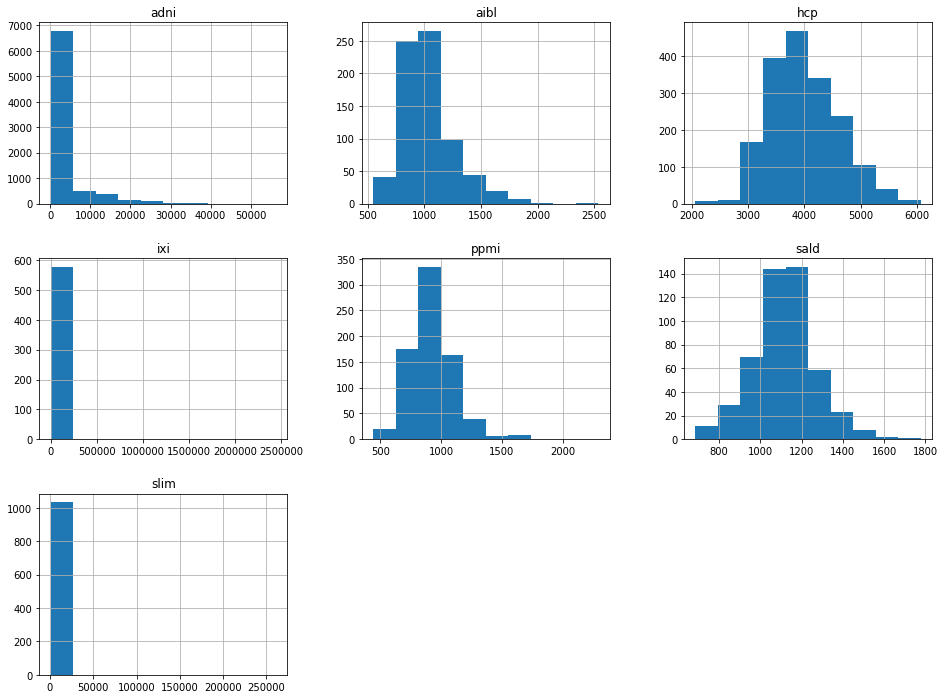

In [6]:
_= pd.DataFrame.hist(mx, figsize=(16,12))

In [7]:
mean1 = pd.DataFrame({'ixi':bias_ixi['Mean'], 'adni':bias_adni['Mean'], 'ppmi':bias_ppmi['Mean'], 
                  'aibl':bias_aibl['Mean'], 'sald':bias_sald['Mean'], 'slim':bias_slim['Mean'], 'hcp':bias_hcp['Mean']})
mean1.head().round(0)

,ixi,adni,ppmi,aibl,sald,slim,hcp
0,120.0,267.0,99.0,83.0,71.0,100.0,410.0
1,416.0,265.0,118.0,86.0,89.0,127.0,319.0
2,408.0,267.0,87.0,103.0,104.0,169.0,389.0
3,315.0,244.0,110.0,121.0,109.0,106.0,473.0
4,362.0,248.0,104.0,105.0,125.0,155.0,449.0


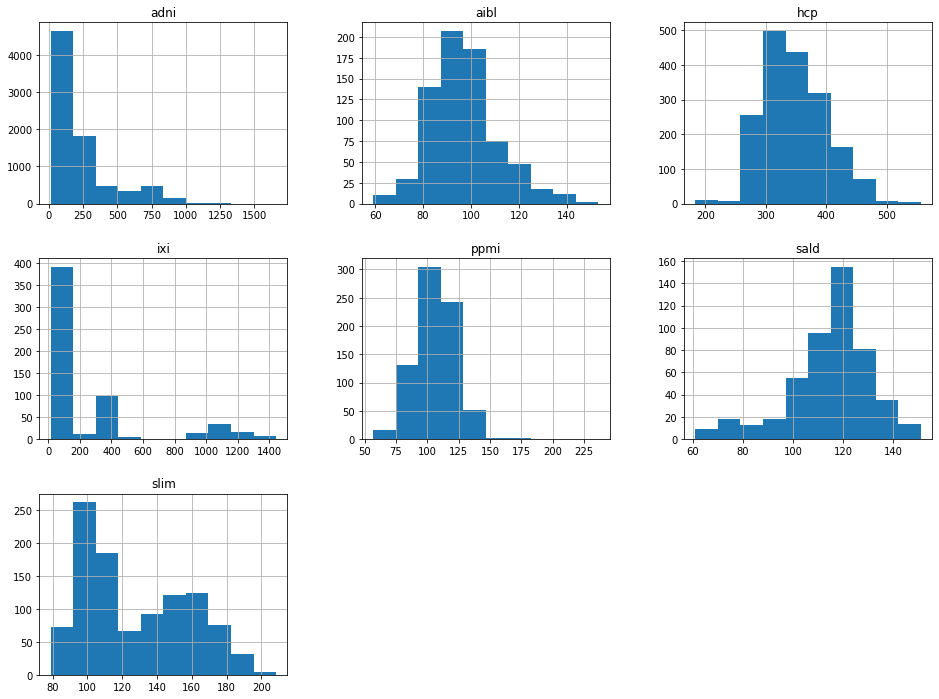

In [8]:
_= pd.DataFrame.hist(mean1, figsize=(16,12))

(0, 8000)

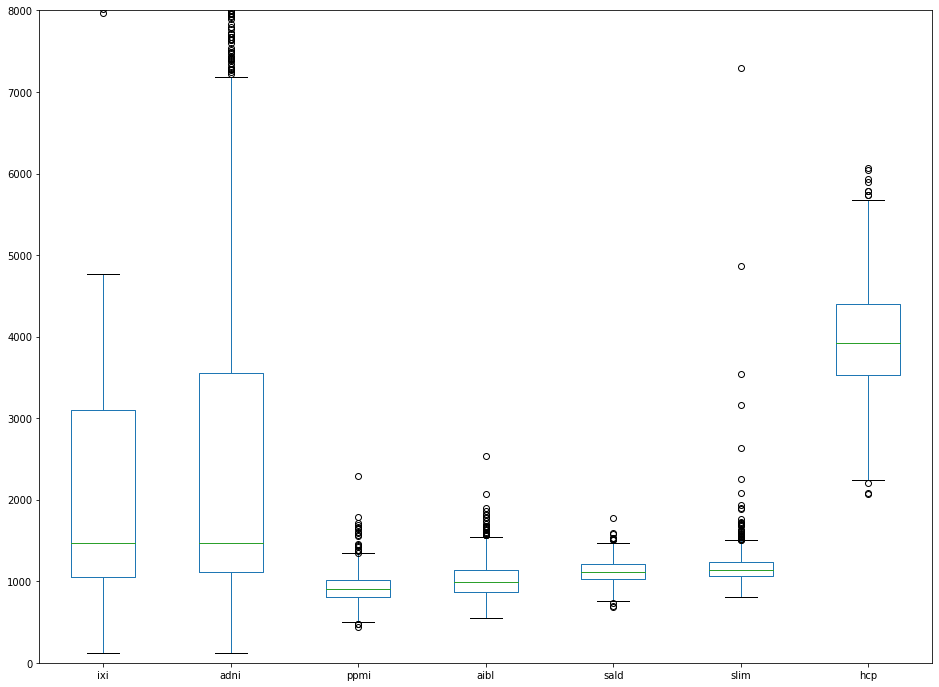

In [9]:
ax1 = mx.plot(kind='box', figsize=(16,12))
ax1.set_ylim(0,8000)

(0, 600)

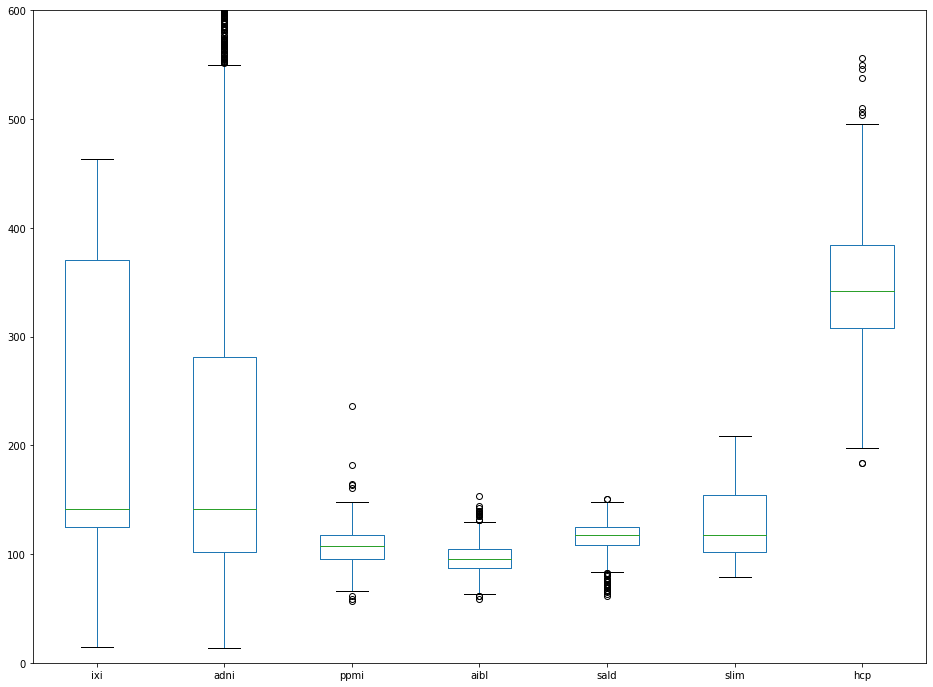

In [10]:
ax2 = mean1.plot(kind='box', figsize=(16,12))
ax2.set_ylim(0,600)